In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import warnings

# Dependency imports
from absl import flags
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
import numpy as np
import tensorflow.compat.v1 as tf
import tensorflow_probability as tfp
import pickle 

from models.bayesian_resnet import bayesian_resnet
from models.bayesian_vgg import bayesian_vgg

matplotlib.use("Agg")
warnings.simplefilter(action="ignore")
tfd = tfp.distributions

IMAGE_SHAPE = [32, 32, 3]

### SAVE AND LOAD LOSSES PICKLES

#### FAKE DATA

In [8]:
##LOAD LOSSES
with open ('lossesFAKE/adam', 'rb') as fp:
    adam = pickle.load(fp)
with open ('lossesFAKE/adagrad', 'rb') as fp:
    adagrad = pickle.load(fp)
#with open ('lossesFAKE/adadelta', 'rb') as fp:
#   adadelta = pickle.load(fp)
#with open ('lossesFAKE/rmsprop', 'rb') as fp:
#    rmsprop = pickle.load(fp)

#### REAL CIFAR-10 DATA

In [ ]:
##LOAD LOSSES
with open ('lossesCIFAR/adam', 'rb') as fp:
    adamreal = pickle.load(fp)
with open ('lossesCIFAR/adagrad', 'rb') as fp:
    adagradreal = pickle.load(fp)
#with open ('lossesCIFAR/adadelta', 'rb') as fp:
#   adadeltareal = pickle.load(fp)
#with open ('lossesCIFAR/rmsprop', 'rb') as fp:
#    rmspropreal = pickle.load(fp)

## PLOTS

In [4]:
def tsplotseveral(x, y, n=20, percentile_min=1, percentile_max=99, color='r', plot_mean=True, plot_median=False, line_color='k', **kwargs):
    line_colors=['r','b','g','y','black']
    colors=['r','b','g','y','black']
    labels= ['ADAM','Momentum','BBB','MISSO','SAG']
    i = 0
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 3.5))
    axes.set_facecolor('white')
    axes.grid(linestyle='-', linewidth='0.2', color='grey')
    axes.spines['bottom'].set_color('black')
    axes.spines['top'].set_color('black') 
    axes.spines['right'].set_color('black')
    axes.spines['left'].set_color('black')
    
    for element in y:
      perc1 = np.percentile(element, np.linspace(percentile_min, 50, num=n, endpoint=False), axis=0)
      perc2 = np.percentile(element, np.linspace(50, percentile_max, num=n+1)[1:], axis=0)


      if 'alpha' in kwargs:
          alpha = kwargs.pop('alpha')
      else:
          alpha = 1/n
      alpha = 0.005
      # fill lower and upper percentile groups
      for p1, p2 in zip(perc1, perc2):
          plt.fill_between(x, p1, p2, alpha=alpha, color=colors[i], edgecolor=None)


      if plot_mean:
          plt.plot(x, np.mean(element, axis=0), color=line_colors[i],label=labels[i])


      if plot_median:
          plt.plot(x, np.median(element, axis=0), color=line_colors[i],label=labels[i])
      i += 1
    leg = plt.legend(fontsize=18,fancybox=True, loc=0,ncol=3)
    leg.get_frame().set_alpha(0.5)
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('ELBO', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(linestyle='dotted',linewidth=2)
    pylab.ticklabel_format(axis='y',style='sci',scilimits=(1,4))
    fig.tight_layout()
    return plt.gca()

In [5]:
iterations = len(adam[0])
iterations

15

In [6]:
itera = np.linspace(0,iterations,iterations)

### Fake data plot

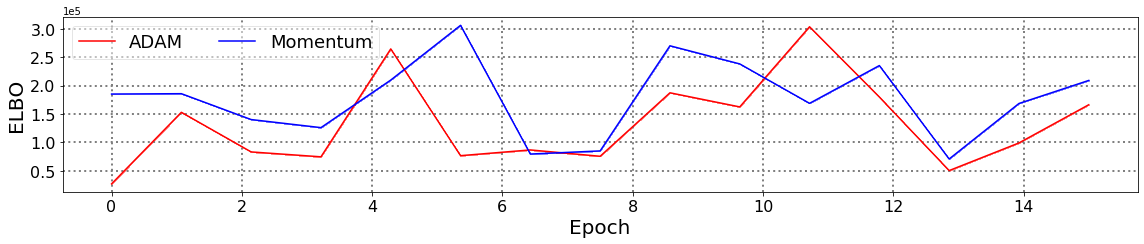

In [9]:
tsplotseveral(itera,[adam, adagrad], n=100)

### Real data plot

In [ ]:
tsplotseveral(itera,[adamreal, adagradreal], n=100)